In [1]:
import random

def roll_dice():
    # Each die has 2 of each: Left, Right, Center, and Dot
    outcomes = ['L', 'R', 'C', 'L', 'R', '.']
    return [random.choice(outcomes) for _ in range(3)]

def play_lcr(num_players):
    players = [3 for _ in range(num_players)]  # Each player starts with 3 tokens
    pot = 0  # Tokens in the center
    current_player = 0
    rounds = 0

    while players.count(0) < num_players - 1:  # Continue until only one player has tokens left
        num_dice = min(players[current_player], 3)
        roll = roll_dice()[:num_dice]
        for outcome in roll:
            if outcome == 'L':
                players[current_player] -= 1
                players[(current_player - 1) % num_players] += 1
            elif outcome == 'R':
                players[current_player] -= 1
                players[(current_player + 1) % num_players] += 1
            elif outcome == 'C':
                players[current_player] -= 1
                pot += 1
        current_player = (current_player + 1) % num_players
        if current_player == 0:
            rounds += 1

    winner = players.index(max(players))
    return winner, pot, rounds 

# Simulate a game with N players
N = 5
winner, pot, rounds = play_lcr(N)
print(f"Player {winner + 1} won with {pot} tokens in the pot after {rounds} rounds!")


Player 2 won with 12 tokens in the pot after 5 rounds!


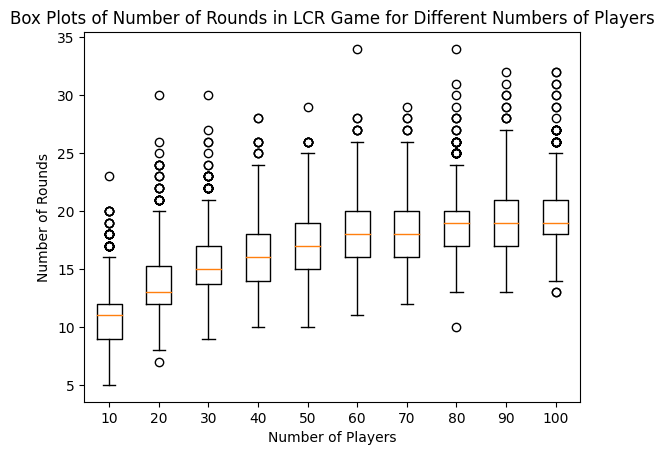

In [2]:
import matplotlib.pyplot as plt

# Simulate the game many times for given number of players and provide boxplots
num_simulations = 1000
rounds_dict = {num_players: [] for num_players in range(10, 101, 10)}
for num_players in rounds_dict:
    for _ in range(num_simulations):
        _, _, rounds = play_lcr(num_players)
        rounds_dict[num_players].append(rounds)

# Create side-by-side box plots of the number of rounds for each number of players
plt.boxplot([rounds_dict[num_players] for num_players in rounds_dict], labels=[str(num_players) for num_players in rounds_dict])
plt.title('Box Plots of Number of Rounds in LCR Game for Different Numbers of Players')
plt.xlabel('Number of Players')
plt.ylabel('Number of Rounds')
plt.show()


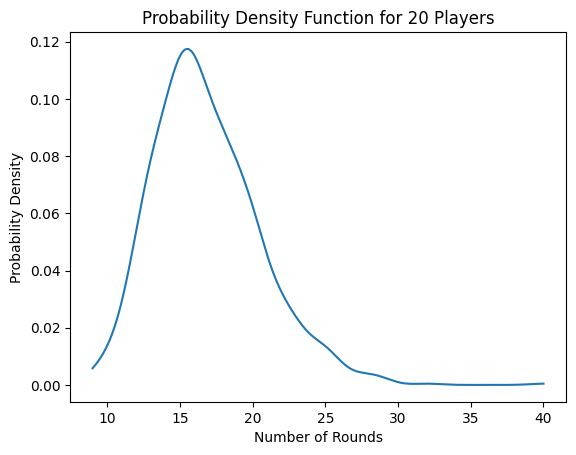

In [7]:
import numpy as np
from scipy.stats import gaussian_kde

# Choose a number of players
num_players = 20

# Estimate the PDF
data = rounds_dict[num_players]
density = gaussian_kde(data)

# Plot the PDF
x = np.linspace(min(data), max(data), 1000)
plt.plot(x, density(x))
plt.title(f'Probability Density Function for {num_players} Players')
plt.xlabel('Number of Rounds')
plt.ylabel('Probability Density')
plt.show()


In [8]:
def roll_dice_wild():
    # Each die has 1 Left, 1 Right, 1 Center, 2 Dots, and 1 Win
    outcomes = ['L', 'R', 'C', '.L', 'R', 'W']
    return [random.choice(outcomes) for _ in range(3)]

def steal_chips(players, current_player, num_chips):
    # Steal chips from other players, favoring players with 3 chips
    for _ in range(num_chips):
        if sum(players) - players[current_player] > 0:  # Check if there are any chips left to steal
            # First try to steal from players with 3 chips
            for i in [idx for idx, val in enumerate(players) if val == 3 and idx != current_player]:
                players[current_player] += 1
                players[i] -= 1
                break
            else:  # If no players with 3 chips, steal from the first player with chips
                for i in reversed(range(len(players))):
                    if i != current_player and players[i] > 0:
                        players[current_player] += 1
                        players[i] -= 1
                        break


def play_lcr_wild(num_players):
    players = [3 for _ in range(num_players)]  # Each player starts with 3 tokens
    pot = 0  # Tokens in the center
    current_player = 0
    rounds = 0
    pot_history = []  # List to keep track of players who got 3 wilds

    while players.count(0) < num_players - 1:  # Continue until only one player has tokens left
        num_dice = min(players[current_player], 3)  # Player can roll up to 3 dice
        roll = roll_dice_wild()[:num_dice]
        if roll.count('W') == 3:
            players[current_player] += pot
            pot_history.append((current_player, pot, rounds))  # Add the player and the pot size to the history
            pot = 0
        else:
            for outcome in roll:
                if outcome == 'L':
                    players[current_player] -= 1
                    players[(current_player - 1) % num_players] += 1
                elif outcome == 'R':
                    players[current_player] -= 1
                    players[(current_player + 1) % num_players] += 1
                elif outcome == 'C':
                    players[current_player] -= 1
                    pot += 1
                elif outcome == 'W':
                    steal_chips(players, current_player, 1)
        current_player = (current_player + 1) % num_players
        if current_player == 0:
            rounds += 1

    winner = players.index(max(players))
    return winner, pot, rounds, pot_history

# Simulate a game with N players
N = 100
winner, pot, rounds = play_lcr(N)
print(f"Standard: Player {winner + 1} won with {pot} tokens in the pot after {rounds} rounds!")
winner, pot, rounds, pot_history  = play_lcr_wild(N)
print(f"Wild: Player {winner + 1} won with {pot} tokens in the pot after {rounds} rounds!")
for player, pot, rounds in pot_history:
    print(f"Player {player + 1} got a pot of size {pot} in round {rounds}")


Standard: Player 42 won with 299 tokens in the pot after 29 rounds!
Wild: Player 11 won with 297 tokens in the pot after 35 rounds!
